In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("housing.csv") 
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [6]:
df_numeric = df.drop(columns=["ocean_proximity"])
print(df_numeric)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [11]:
X = df_numeric.drop("median_house_value", axis=1)
y = df_numeric["median_house_value"]
print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  
0   

In [14]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
print(X_imputed)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  3.2200e+02  1.2600e+02
   8.3252e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  2.4010e+03  1.1380e+03
   8.3014e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  4.9600e+02  1.7700e+02
   7.2574e+00]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  1.0070e+03  4.3300e+02
   1.7000e+00]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  7.4100e+02  3.4900e+02
   1.8672e+00]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  1.3870e+03  5.3000e+02
   2.3886e+00]]


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print(X_scaled)

[[-1.32783522  1.05254828  0.98214266 ... -0.9744286  -0.97703285
   2.34476576]
 [-1.32284391  1.04318455 -0.60701891 ...  0.86143887  1.66996103
   2.33223796]
 [-1.33282653  1.03850269  1.85618152 ... -0.82077735 -0.84363692
   1.7826994 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.3695372  -0.17404163
  -1.14259331]
 [-0.87362627  1.77823747 -0.84539315 ... -0.60442933 -0.39375258
  -1.05458292]
 [-0.83369581  1.75014627 -1.00430931 ... -0.03397701  0.07967221
  -0.78012947]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [17]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [18]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 13676233857.92


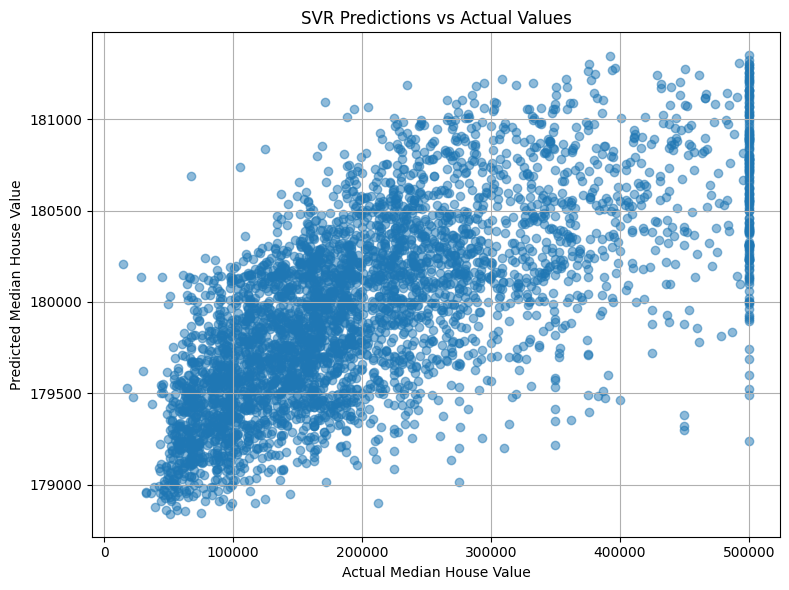

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("SVR Predictions vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()
